#BÚSQUEDA DE COSTO UNIFORME


**Implementacionde Clases**

In [ ]:
#Clase Acción
class Accion:
  def __init__(self, nombre):
    self.nombre = nombre

  def __str__(self):
    return self.nombre

In [ ]:
#Clase Estado
class Estado:
  def __init__(self, nombre, acciones):
    self.nombre = nombre
    self.acciones = acciones

  def __str__(self):
    return self.nombre

In [ ]:
#Clase Problema.
class Problema:
  def __init__(self, estado_inicial, estados_objetivos, acciones, costes=None):
    self.estado_inicial = estado_inicial
    self.estados_objetivos = estados_objetivos
    self.acciones = acciones
    self.costes = costes
    self.infinito = 99999
    # -- Si no se tiene costos, se inicializa todos los costos con 1
    if not self.costes:
      self.costes = {}
      for estado in self.acciones.keys():
        self.costes[estado] = {}
        for accion in self.acciones[estado].keys():
          self.costes[estado][accion] = 1

  def __str__(self):
    msg = "Estado Inicial: {0} -> Objetivos: {1}"
    return msg.format(self.estado_inicial.nombre,self.estados_objetivos)

  # -- Determina si se alcanzó el objetivo
  def es_objetivo(self, estado):
    return estado in self.estados_objetivos

  # -- Determina el estado al que se llega del estado actual en base a la acción
  def resultado(self, estado, accion):
    if estado.nombre not in self.acciones.keys():
      return None
    # -- Recuperar diccionario de posibles acciones que se pueden realizar del estado actual
    acciones_estado = self.acciones[estado.nombre]
    if accion.nombre not in acciones_estado.keys():
      return None
    # -- Recupera y devuelve el nuevo estado alcanzado después de ejecutar la acción
    return acciones_estado[accion.nombre]

  # -- Determina el costo de una acción de un estado
  def coste_accion(self, estado, accion):
    if estado.nombre not in self.costes.keys():
      return self.infinito
    costes_estado = self.costes[estado.nombre]
    if accion.nombre not in costes_estado.keys():
      return self.infinito
    return costes_estado[accion.nombre]

  # -- Determina el costo del camino desde la raiz a un nodo dado
  def coste_camino(self, nodo):
    total = 0
    while nodo.padre:
      total += self.coste_accion(nodo.padre.estado, nodo.accion)
      nodo = nodo.padre
    return total

In [ ]:
#Clase Nodo
class Nodo:
  def __init__(self, estado, accion=None, acciones=None, padre=None, coste = 0):
    self.estado = estado # -- Estado al que corresponde el nodo
    self.accion = accion # -- Acción mediante la cuál se llegó a este nodo
    self.acciones = acciones # -- Acciones posibles a realizar a partir de este nodo para llegar a los hijos
    self.padre = padre
    self.hijos = [] # -- Lista de nodos hijo (objetos) del nodo actual
    self.coste = coste

  def __str__(self):
    return self.estado.nombre

  # Método para expandir el nodo a los nodos hijo
  # -- Devuelve una lista de nodos hijo del nodo actual
  def expandir(self, problema):
    # -- Inicializar lista de nodos hijo
    self.hijos = []
    # -- Validar si el estado actual está o no en el contexto del problema
    if not self.acciones:
      if self.estado.nombre not in problema.acciones.keys():
        return self.hijos
      self.acciones = problema.acciones[self.estado.nombre]
    # -- Recuperar los nodos hijo en función a las acciones que se pueden realizar
    for accion in self.acciones.keys():
      accion_hijo = Accion(accion)
      nuevo_estado = problema.resultado(self.estado, accion_hijo)
      acciones_nuevo = {}
      if nuevo_estado.nombre in problema.acciones.keys():
        acciones_nuevo = problema.acciones[nuevo_estado.nombre]
      hijo = Nodo(nuevo_estado, accion_hijo, acciones_nuevo, self)
      # -- Determinar el costo del hijo
      coste = self.padre.coste if self.padre else 0
      coste += problema.coste_accion(self.estado, accion_hijo)
      hijo.coste = coste
      self.hijos.append(hijo)

    # -- Devuelve la lista de nodos hijo
    return self.hijos

  # Método para seleccionar el hijo con el costo óptimo
  def hijo_mejor(self, problema):
    if not self.hijos:
      return None
    mejor = self.hijos[0]
    for hijo in self.hijos:
      if (hijo.coste < mejor.coste):
        mejor = hijo
    return mejor

# Problema a solucionar
COnstruiremos el mapa de ciudades con los costos de los caminos en kilometros a cada ciudad.


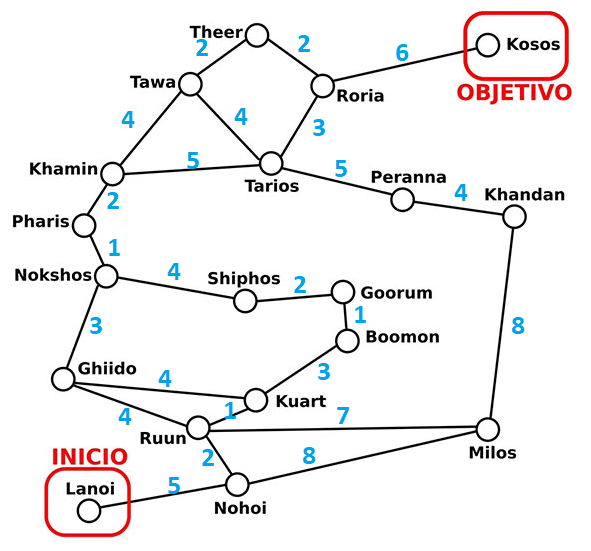

In [ ]:
#Clase ViajesCiudades
class ViajesCiudades:

  def __init__(self):
    # -- Nombre de la clase
    self.nombre = 'BUSQUEDA DE COSTO UNIFORME'

    # -- Definición de acciones
    accN = Accion ('N')
    accS = Accion ('S')
    accE = Accion ('E')
    accO = Accion ('O')
    accNE = Accion ('NE')
    accNO = Accion ('NO')
    accSE = Accion ('SE')
    accSO = Accion ('SO')


    # -- Definción de estados
    lanoi = Estado('Lanoi', [accNE])
    nohoi = Estado ('Nohoi', [accSO, accNO, accNE])
    ruun = Estado('Ruun', [accNO, accNE, accE, accSE])
    milos = Estado('Milos', [accO, accSO, accN])
    ghiido = Estado('Ghiido', [accN, accE, accSE])
    kuart = Estado('Kuart', [accO, accSO, accNE])
    boomon = Estado('Boomon', [accN, accSO])
    goorum = Estado('Goorum', [accO, accS])
    shiphos = Estado('Shiphos', [accO, accE])
    nokshos = Estado('Nokshos', [accNO, accS, accE])
    pharis = Estado('Pharis', [accNO, accSO])
    khamin = Estado('Khamin', [accSE, accNO, accO])
    tarios = Estado('Tarios', [accO, accNO, accNE, accE])
    peranna = Estado('Peranna', [accO, accE])
    khandan = Estado('Khandan', [accO, accS])
    tawa = Estado('Tawa', [accSO, accSE, accNE])
    theer = Estado('Theer', [accSO, accSE])
    roria = Estado('Roria', [accNO, accSO, accE])
    kosos = Estado('Kosos', [accO])

    # -- Definición de viajes
    viajes = {'Lanoi': {'NE': nohoi},
              'Nohoi': {'SO': lanoi,
                        'NO': ruun,
                        'NE': milos},
              'Ruun' : {'NO': ghiido,
                        'NE': kuart,
                        'E': milos,
                        'SE': nohoi},
              'Ghiido' : {'N': nokshos,
                          'E': kuart,
                          'SE': ruun},
              'Milos' : {'O': ruun,
                          'SO': nohoi,
                          'N': khandan},
              'Kuart': {'O': ghiido,
                        'SO': ruun,
                        'NE': boomon},
              'Boomon': {'N': goorum,
                         'SO': kuart},
              'Goorum': {'O': shiphos,
                         'S': boomon},
              'Shiphos': {'O': nokshos,
                          'E': goorum},
              'Nokshos': {'NO': pharis,
                          'S': ghiido,
                          'E': shiphos},
              'Pharis': {'NO': khamin,
                        'SO': nokshos},
              'Khamin': {'SE': pharis,
                         'NO': tawa,
                         'O': tarios},
              'Tarios': {'O': khamin,
                        'NO': tawa,
                        'NE': roria,
                        'E': peranna},
              'Peranna': {'O': tarios,
                          'E': khandan},
              'Khandan': {'O': peranna,
                          '5': milos},
              'Tawa': {'SO': khamin,
                      'SE': tarios,
                      'NE': theer},
              'Theer': {'SO': tawa,
                        'SE': roria},
              'Roria': {'NO': theer,
                        'SO': tarios,
                        'E': kosos},
              'Kosos': {'O': roria}
            }

    # Definimos los costos referentes a cada ciudad
    costos = {'Lanoi': {'NE': 5},
              'Nohoi': {'SO': 5,
                        'NO': 2,
                        'NE': 8},
              'Ruun' : {'NO': 4,
                        'NE': 1,
                        'E': 7,
                        'SE': 2},
              'Ghiido' : {'N': 3,
                          'E': 4,
                          'SE': 4},
              'Milos' : {'O': 7,
                          'SO': 8,
                          'N': 8},
              'Kuart': {'O': 4,
                        'SO': 1,
                        'NE': 3},
              'Boomon': {'N': 1,
                         'SO': 3},
              'Goorum': {'O': 2,
                         'S': 1},
              'Shiphos': {'O': 4,
                          'E': 2},
              'Nokshos': {'NO': 1,
                          'S': 3,
                          'E': 4},
              'Pharis': {'NO': 2,
                        'SO': 1},
              'Khamin': {'SE': 2,
                         'NO': 4,
                         'O': 5},
              'Tarios': {'O': 5,
                        'NO': 4,
                        'NE': 3,
                        'E': 5},
              'Peranna': {'O': 5,
                          'E': 4},
              'Khandan': {'O': 4,
                          'S': 8},
              'Tawa': {'SO': 4,
                      'SE': 4,
                      'NE': 2},
              'Theer': {'SO': 2,
                        'SE': 2},
              'Roria': {'NO': 2,
                        'SO': 3,
                        'E': 6},
              'Kosos': {'O': 6}
            }

    # -- Definir el atributo lista de estados en el contexto del problema
    self.estados = [lanoi, nohoi, ruun, milos, ghiido, kuart, boomon, goorum,
                    shiphos, nokshos, pharis, khamin, tarios, peranna, khandan,
                    tawa, theer, roria, kosos]
    # -- Definir el atributo de los posibles viajes de una ciudad a otras
    self.viajes = viajes
    # -- Definir el atributo de los costos (en km) de los posibles viajes
    self.costes = costos

  def __str__(self):
    return self.nombre

  def crea_nodo_raiz(self, problema):
    estado_raiz = problema.estado_inicial
    acciones_raiz = {}
    if estado_raiz.nombre in problema.acciones.keys():
      acciones_raiz = problema.acciones[estado_raiz.nombre]
    raiz = Nodo(estado_raiz, None, acciones_raiz, None)
    return raiz

  def crea_nodo_hijo (self, problema, padre, accion):
    nuevo_estado = problema.resultado (padre.estado, accion)
    acciones_nuevo = {}
    if nuevo_estado.nombre in problema.acciones.keys():
      acciones_nuevo = problema.acciones[nuevo_estado.nombre]
    hijo = Nodo(nuevo_estado, accion, acciones_nuevo, padre)
    padre.hijos.append(hijo)
    return hijo

  def mostrar_nodo_padre(self, nodo):
    if nodo.padre:
      self.mostrar_nodo_padre(nodo.padre)
      print()
      print('--------------------------------')
      print('Se partió de la ciudad: ', nodo.padre.estado.nombre)
      print('Se realizó la acción: ', nodo.accion.nombre)
      print('Se llegó a la ciudad: ', nodo.estado.nombre)
      print('Se tiene el costo: ', nodo.coste)

  def muestra_solucion(self, objetivo=None):
    if not objetivo:
      print('No hay solucion')
      return
    self.mostrar_nodo_padre(objetivo)




  # ESTRATEGIA DE BUSQUEDA DE COSTO UNIFORME
  def uniforme(self, problema):
    # -- Crea el nodo raiz en función al estado inicial
    raiz = self.crea_nodo_raiz(problema)
    # -- Verifica si se alcanzó el objetivo
    if problema.es_objetivo(raiz.estado):
      return raiz
    # -- Poner la raíz a la cola (frontera)
    frontera = [raiz]
    explorados = set()
    while True:
      # -- Terminar si ya no hay más elementos en la cola
      if not frontera:
        return None
      # -- Recuperar el primer elemento de la cola
      nodo = frontera.pop(0)
      # -- Registrar el estado asociado al nodo como explorado
      if problema.es_objetivo(nodo.estado):
        return nodo
      explorados.add(nodo.estado)
      # -- Si nodo no tiene acciones, continuar en el siguiente nodo
      if not nodo.acciones:
        print ('no se encontraron acciones: ', nodo.estado.nombre)
        continue
      # -- Procesar cada acción y determinar nodos hijo
      for nombre_accion in nodo.acciones.keys():
        accion =  Accion(nombre_accion)
        hijo = self.crea_nodo_hijo(problema, nodo, accion)
        estados_frontera = [nodo.estado for nodo in frontera]
        if (hijo.estado not in explorados and hijo.estado not in estados_frontera):
          hijo.coste=problema.coste_camino(hijo)
          confirmacion=0
          for x in range(len(frontera)):
            if hijo.coste < frontera[x].coste:
              confirmacion=1
              frontera.insert(x,hijo)
          if confirmacion==0:
            frontera.insert(len(frontera),hijo)




  # Determinar una ruta utilizando la estrategía de búsqueda por anchura
  def DeterminarRuta(self):
    # -- Solicitar ciudad inicial y ciudad destino
    ciudad_inicial = input('Ingrese ciudad de partida: ')
    ciudad_destino = input('Ingrese ciudad de destino: ')
    # -- Generar estado_inicial y estados objetivo
    estado_inicial = [e for e in self.estados if e.nombre == ciudad_inicial][0]
    estados_objetivo = [e for e in self.estados if e.nombre == ciudad_destino]
    # -- Instanciar la clase Problema
    problema = Problema(estado_inicial, estados_objetivo, self.viajes, self.costes)
    solucion = self.uniforme(problema)
    self.muestra_solucion(solucion)

In [ ]:
# -- Crear una instancia de la clase de viajes de ciudades
viaje_ciudades = ViajesCiudades()
# -- Determinar rutas
viaje_ciudades.DeterminarRuta()

Ingrese ciudad de partida: Lanoi
Ingrese ciudad de destino: Kosos

--------------------------------
Se partió de la ciudad:  Lanoi
Se realizó la acción:  NE
Se llegó a la ciudad:  Nohoi
Se tiene el costo:  5

--------------------------------
Se partió de la ciudad:  Nohoi
Se realizó la acción:  NO
Se llegó a la ciudad:  Ruun
Se tiene el costo:  7

--------------------------------
Se partió de la ciudad:  Ruun
Se realizó la acción:  NO
Se llegó a la ciudad:  Ghiido
Se tiene el costo:  11

--------------------------------
Se partió de la ciudad:  Ghiido
Se realizó la acción:  N
Se llegó a la ciudad:  Nokshos
Se tiene el costo:  14

--------------------------------
Se partió de la ciudad:  Nokshos
Se realizó la acción:  NO
Se llegó a la ciudad:  Pharis
Se tiene el costo:  15

--------------------------------
Se partió de la ciudad:  Pharis
Se realizó la acción:  NO
Se llegó a la ciudad:  Khamin
Se tiene el costo:  17

--------------------------------
Se partió de la ciudad:  Khamin
Se rea